In [18]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [19]:
df=pd.read_csv("adult_salary.csv")

In [20]:
print(df.isnull().sum())

Age              0
Emp_type         0
Fnlwgt           0
Education        0
Education_num    0
Marital          0
Occupation       0
Relationship     0
Race             0
Sex              0
Capital_gain     0
Capital_loss     0
weekly_hours     0
Country          0
Income           0
dtype: int64


In [21]:
df2=df.fillna(value = 0)
print(df2.isnull().sum())

Age              0
Emp_type         0
Fnlwgt           0
Education        0
Education_num    0
Marital          0
Occupation       0
Relationship     0
Race             0
Sex              0
Capital_gain     0
Capital_loss     0
weekly_hours     0
Country          0
Income           0
dtype: int64


In [22]:
df2=df2.drop('Fnlwgt',axis=1)

In [23]:
print(df2.shape)

(48842, 14)


In [24]:
print(df2.dtypes)

Age               int64
Emp_type         object
Education        object
Education_num     int64
Marital          object
Occupation       object
Relationship     object
Race             object
Sex              object
Capital_gain      int64
Capital_loss      int64
weekly_hours      int64
Country          object
Income           object
dtype: object


In [25]:
print(df2.head(5))

   Age           Emp_type   Education  Education_num              Marital  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   Capital_loss  weekly_hours         Country  Income  
0             0            40   United-States   

In [26]:
print(df2.describe())

                Age  Education_num  Capital_gain  Capital_loss  weekly_hours
count  48842.000000   48842.000000  48842.000000  48842.000000  48842.000000
mean      38.643585      10.078089   1079.067626     87.502314     40.422382
std       13.710510       2.570973   7452.019058    403.004552     12.391444
min       17.000000       1.000000      0.000000      0.000000      1.000000
25%       28.000000       9.000000      0.000000      0.000000     40.000000
50%       37.000000      10.000000      0.000000      0.000000     40.000000
75%       48.000000      12.000000      0.000000      0.000000     45.000000
max       90.000000      16.000000  99999.000000   4356.000000     99.000000


In [27]:
print(df2.groupby('Income').size())

Income
 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
dtype: int64


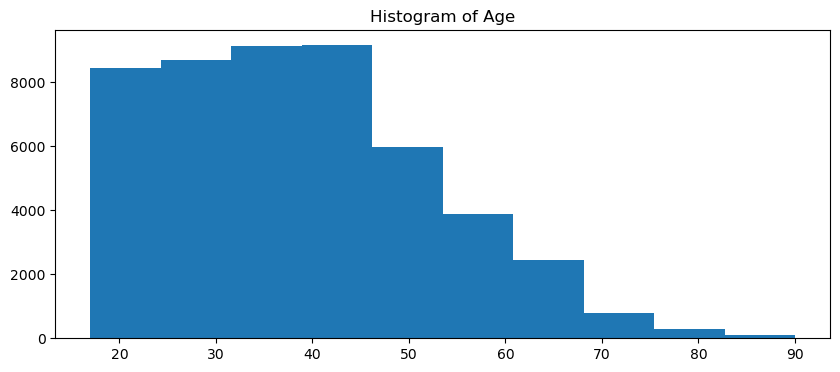

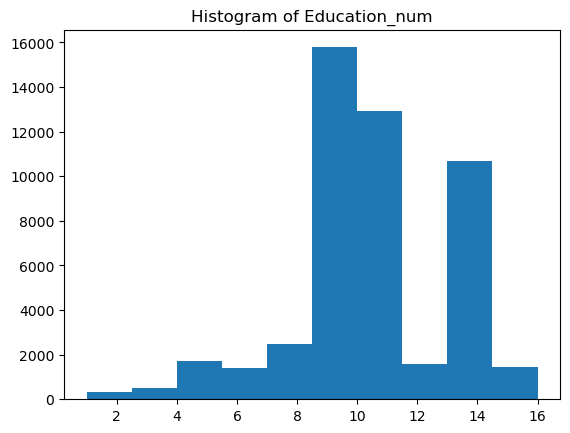

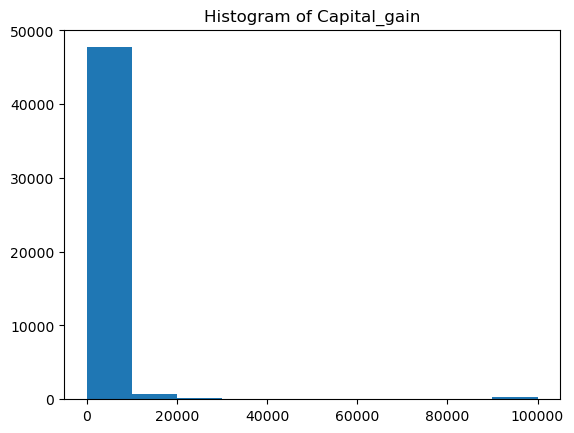

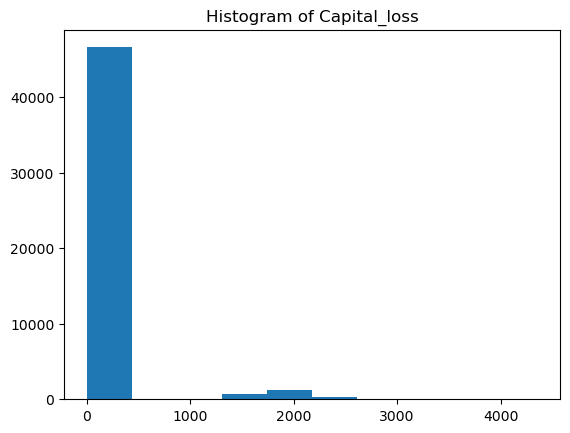

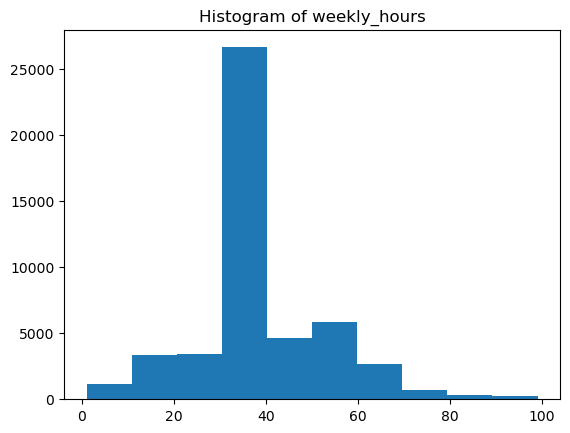

In [28]:
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns
pyplot.figure(figsize=(10, 4))
for column in numerical_columns:
    pyplot.hist(df[column])
    pyplot.title(f'Histogram of {column}')
    pyplot.show()

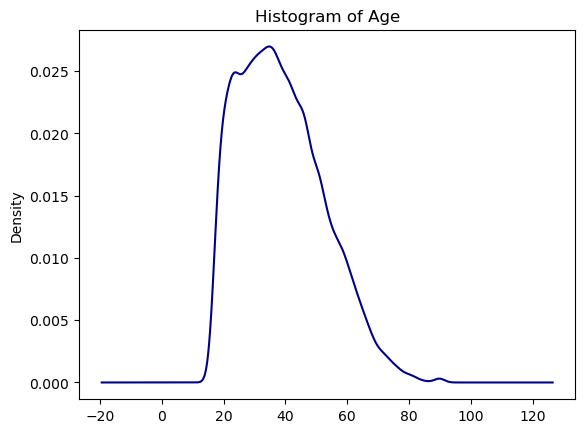

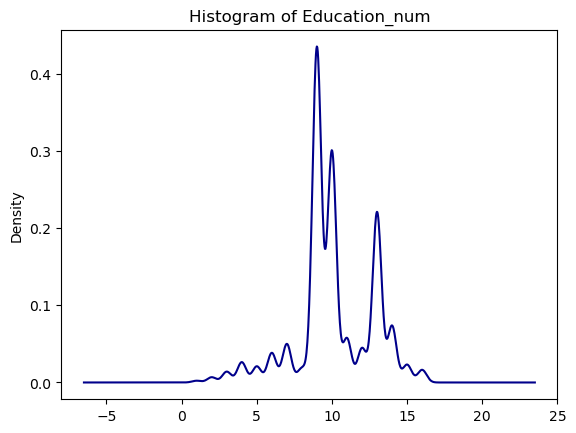

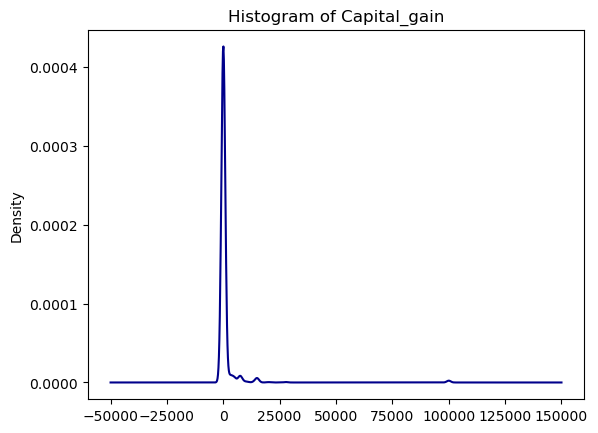

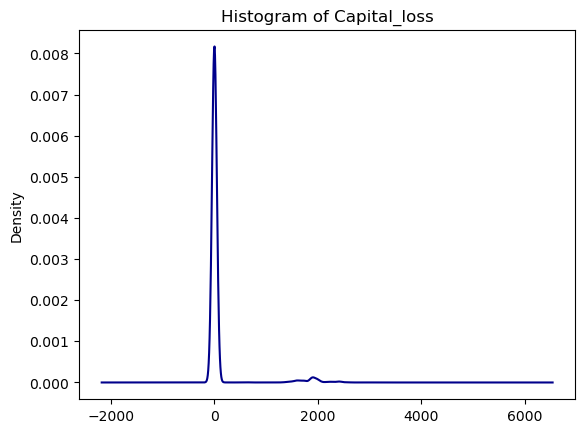

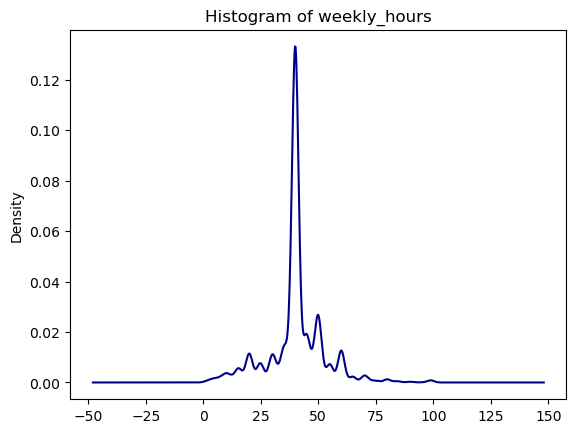

In [29]:
for column in numerical_columns:
    df2[column].plot(kind='density', color='darkblue')
    pyplot.title(f'Histogram of {column}')
    pyplot.show()

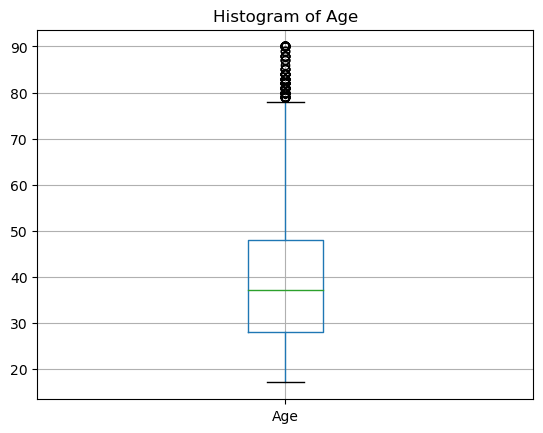

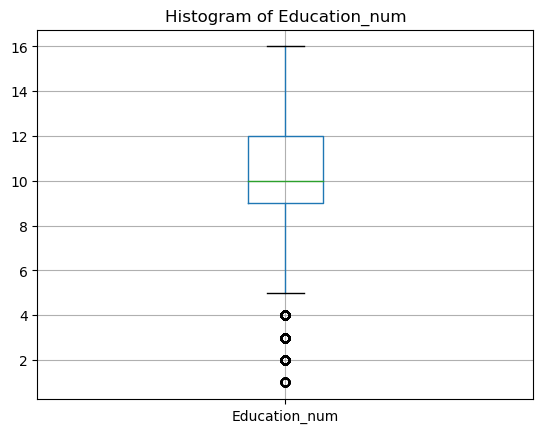

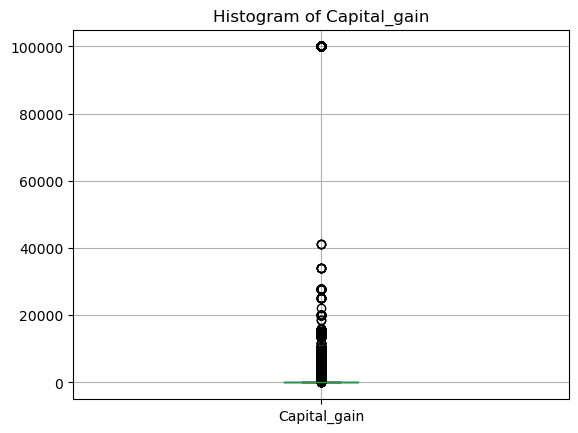

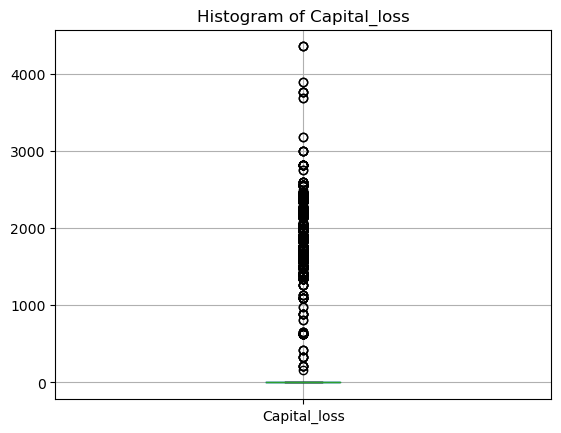

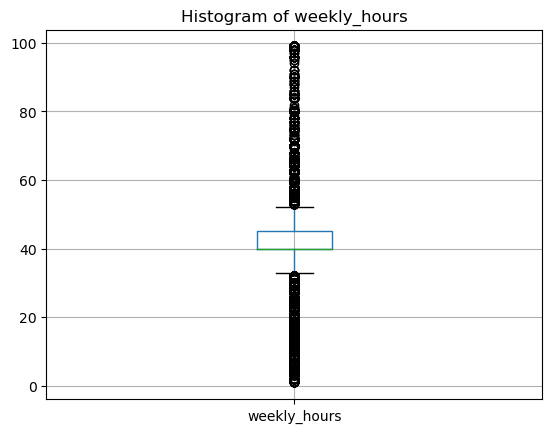

In [30]:
for column in numerical_columns:
    df2.boxplot(column=column, vert=True)
    pyplot.title(f'Histogram of {column}')
    pyplot.show()

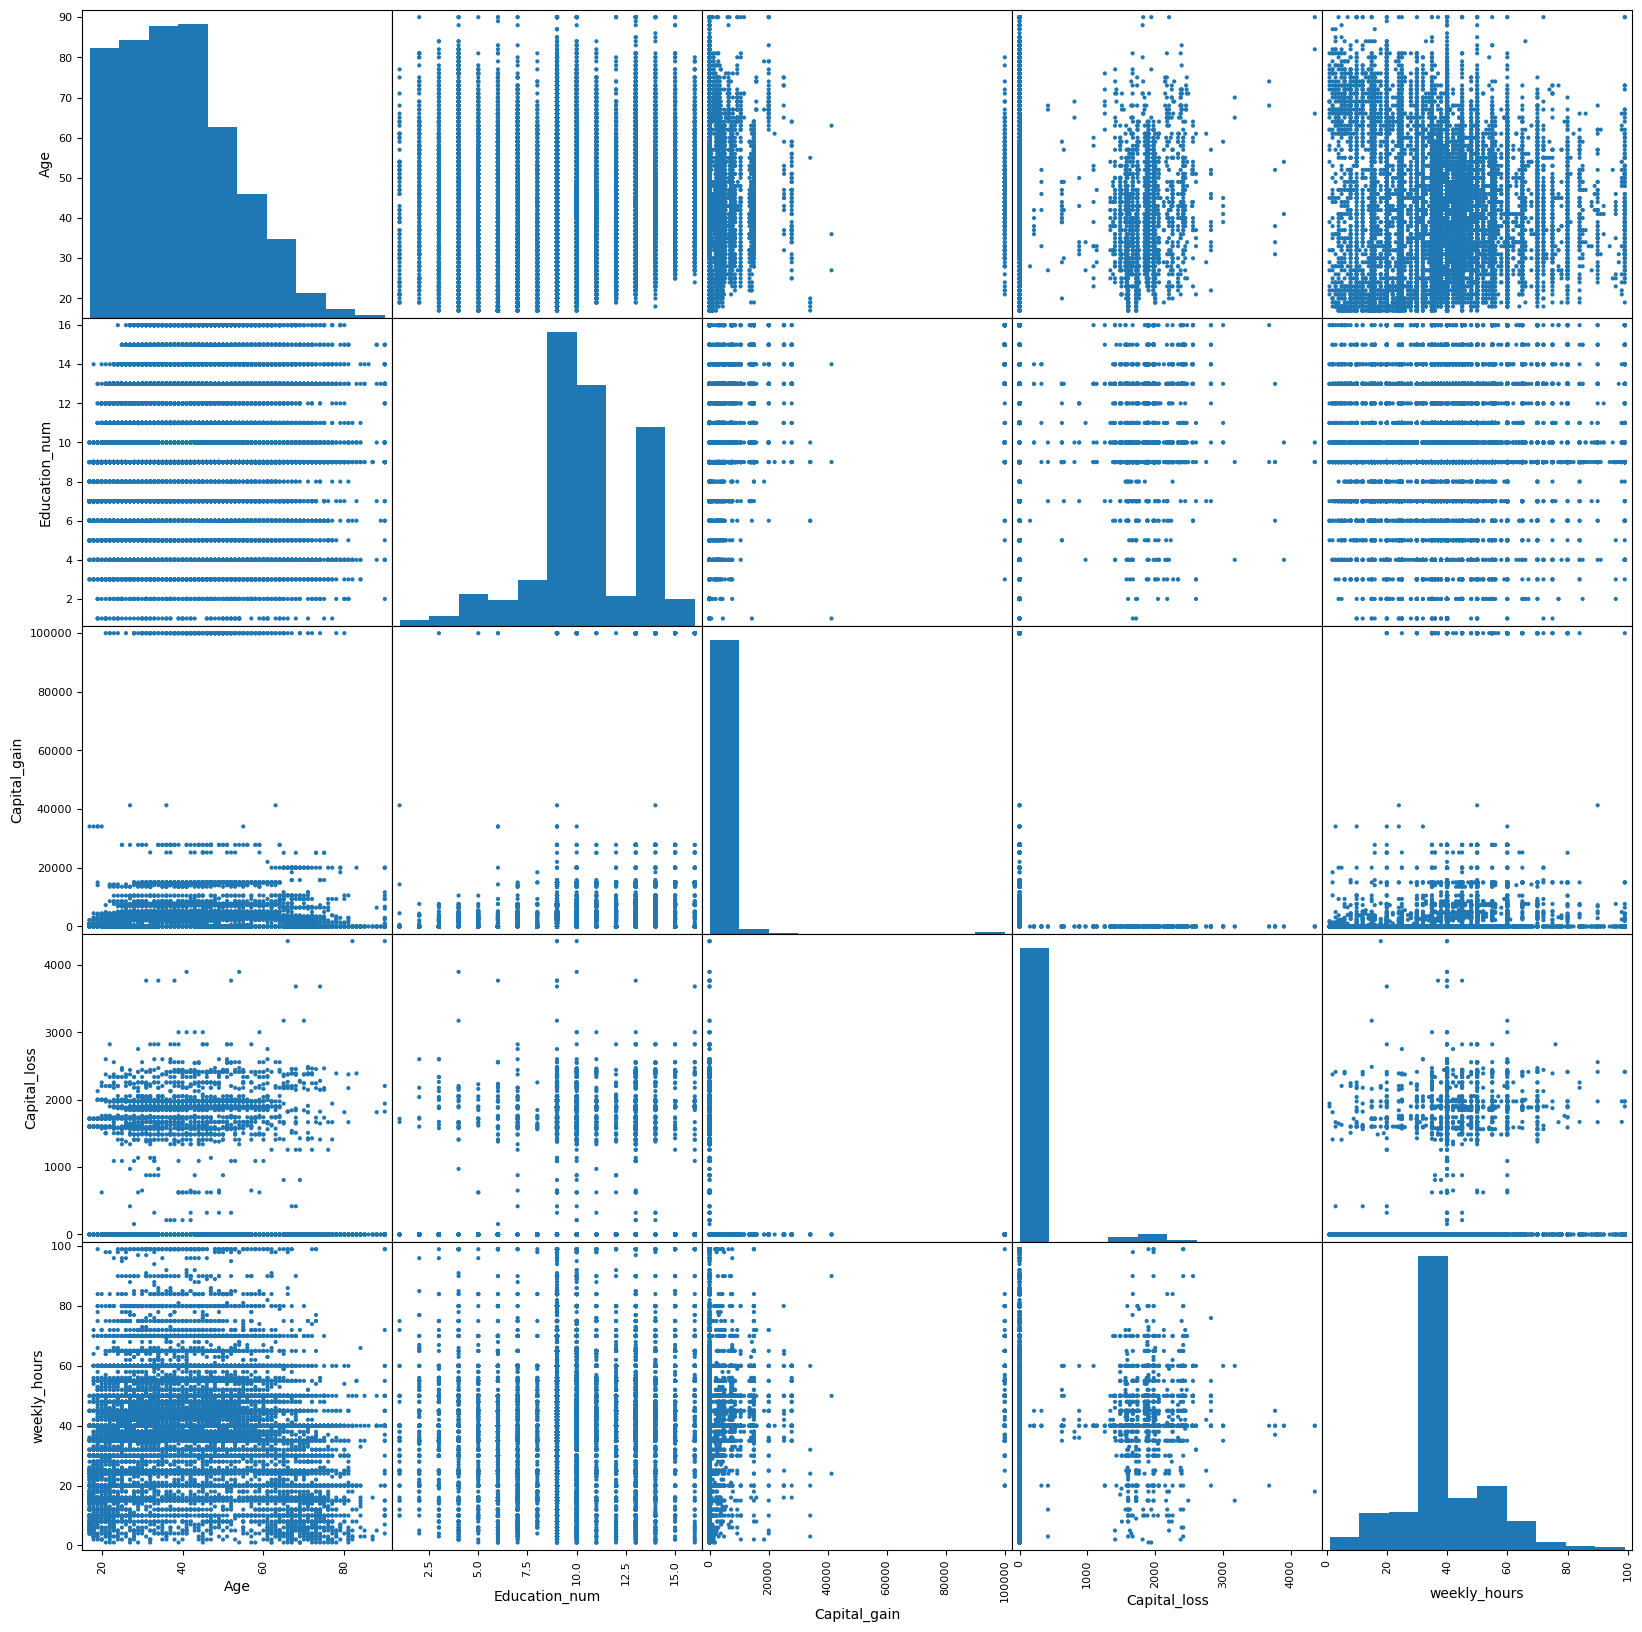

In [31]:
scatter_matrix(df2, alpha=1.0, figsize=(20,20))
pyplot.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
non_numeric_columns = df2.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

In [33]:
# Store dataframe values into a numpy array
array = df2.values
array = np.asarray(array)
# separate array into input and output components by slicing
# For X (input)
X = array[:,1:12]
# For Y (input)
Y = array[:,12]
df2.Income = pd.Categorical(df2.Income)
df2['Income'] = df2.Income.cat.codes

In [34]:
print(df2.dtypes)

Age              int64
Emp_type         int32
Education        int32
Education_num    int64
Marital          int32
Occupation       int32
Relationship     int32
Race             int32
Sex              int32
Capital_gain     int64
Capital_loss     int64
weekly_hours     int64
Country          int32
Income            int8
dtype: object


In [35]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [36]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report (Y_test, predicted)
print (report)

              precision    recall  f1-score   support

           0       0.06      0.00      0.01       288
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        58
           3       0.04      0.02      0.03        48
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        35
           7       0.00      0.00      0.00        17
           8       0.67      0.05      0.09        44
           9       0.00      0.00      0.00        51
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        82
          12       0.00      0.00      0.00        15
          13       0.40      0.07      0.12        28
          14       0.50      0.04      0.08        23
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00        10
          18       0.00    

C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manda\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
result = model.score (X_test, Y_test)
#Print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 89.484%


In [38]:
new_data = {
    'Age': [39],
    'Emp_type': ['State-gov'],
    'Education': ['Bachelors'],
    'Education_num': [13],
    'Marital': ['Never-married'],
    'Occupation': ['Adm-clerical'],
    'Relationship': ['Not-in-family'],
    'Race': ['White'],
    'Sex': ['Male'],
    'Capital_gain': [2174],
    'Capital_loss': [0]
}
new_df = pd.DataFrame(new_data)

In [39]:
label_encoder = LabelEncoder()
non_numeric_columns = new_df.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    new_df[col] = label_encoder.fit_transform(new_df[col])

In [40]:
predicted = model.predict(new_df)
print(predicted)

[39]


C:\Users\manda\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [41]:
new_data1 = {
    'Age': [52],
    'Emp_type': ['Self-emp-not-inc'],
    'Education': ['HS-grad'],
    'Education_num': [9],
    'Marital': ['Married-civ-spouse'],
    'Occupation': ['Exec-managerial'],
    'Relationship': ['Husband'],
    'Race': ['White'],
    'Sex': ['Male'],
    'Capital_gain': [0],
    'Capital_loss': [0]
}
new_df1 = pd.DataFrame(new_data1)

In [42]:
label_encoder = LabelEncoder()
non_numeric_columns = new_df1.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    new_df1[col] = label_encoder.fit_transform(new_df1[col])

In [43]:
predicted = model.predict(new_df1)
print(predicted)

[39]


C:\Users\manda\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [44]:
num_folds=10
seed=7
kfold=KFold(n_splits=num_folds, shuffle=True, random_state=seed)

scoring='accuracy'
results=cross_val_score(model,X,Y,cv=kfold,scoring=scoring)
print("Accuracy:%.3f(%.3f)"%(results.mean(),results.std()))

Accuracy:0.899(0.004)
